In [0]:
############ 랜덤포레스트 ############

Table of Contents
Library Import
Data Import
EDA
Modeling
Case1 : tool_condition
Case2 : machining_finalized
Case3 : passed_visual_inspection
Discussion

In [0]:
## library import ##
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
## data import ##
experiment_result = pd.read_csv("train.csv")
experiment_result.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN


In [7]:
experiment_01 = pd.read_csv("experiment_01.csv")
print(experiment_01.columns)
experiment_01.head()

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.0,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.6,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.3,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.3,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.3,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep


In [8]:
## EDA ##
print("##########################")
print("##### Feature Counts #####")
print("##########################")
for i in range(1, len(experiment_result.columns)):
    print("####### " + experiment_result.columns[i] + " #######")
    print(experiment_result.iloc[:,i].value_counts())

##########################
##### Feature Counts #####
##########################
####### material #######
wax    18
Name: material, dtype: int64
####### feedrate #######
3     6
20    5
6     5
15    1
12    1
Name: feedrate, dtype: int64
####### clamp_pressure #######
4.0    9
3.0    6
2.5    3
Name: clamp_pressure, dtype: int64
####### tool_condition #######
worn      10
unworn     8
Name: tool_condition, dtype: int64
####### machining_finalized #######
yes    14
no      4
Name: machining_finalized, dtype: int64
####### passed_visual_inspection #######
yes    10
no      4
Name: passed_visual_inspection, dtype: int64


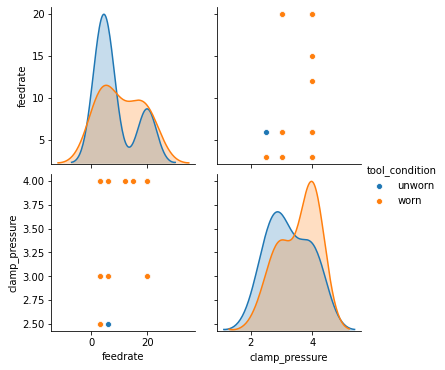

In [9]:
sns.pairplot(experiment_result, hue='tool_condition', vars=["feedrate","clamp_pressure"])

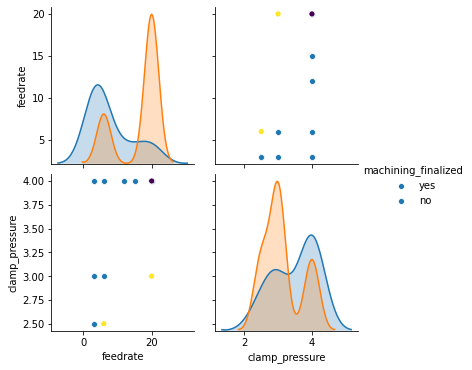

In [10]:
sns.pairplot(experiment_result, hue='machining_finalized', vars=["feedrate","clamp_pressure"])

In [11]:
print("##########################")
print("##### Feature Counts #####")
print("##########################")
for i in ['Machining_Process','M1_CURRENT_PROGRAM_NUMBER','M1_sequence_number','M1_CURRENT_FEEDRATE']:
    print("####### " + i + " #######")
    print(experiment_01[i].value_counts())

##########################
##### Feature Counts #####
##########################
####### Machining_Process #######
Layer 2 Up       203
Layer 3 Up       194
Layer 1 Up       172
Layer 1 Down     148
Layer 3 Down     142
Layer 2 Down     132
Prep              30
Repositioning     25
end                8
Starting           1
Name: Machining_Process, dtype: int64
####### M1_CURRENT_PROGRAM_NUMBER #######
1.0    1055
Name: M1_CURRENT_PROGRAM_NUMBER, dtype: int64
####### M1_sequence_number #######
2.0      102
70.0      30
111.0     30
45.0      29
29.0      29
        ... 
12.0       1
51.0       1
44.0       1
4.0        1
0.0        1
Name: M1_sequence_number, Length: 81, dtype: int64
####### M1_CURRENT_FEEDRATE #######
6.0     991
50.0     64
Name: M1_CURRENT_FEEDRATE, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

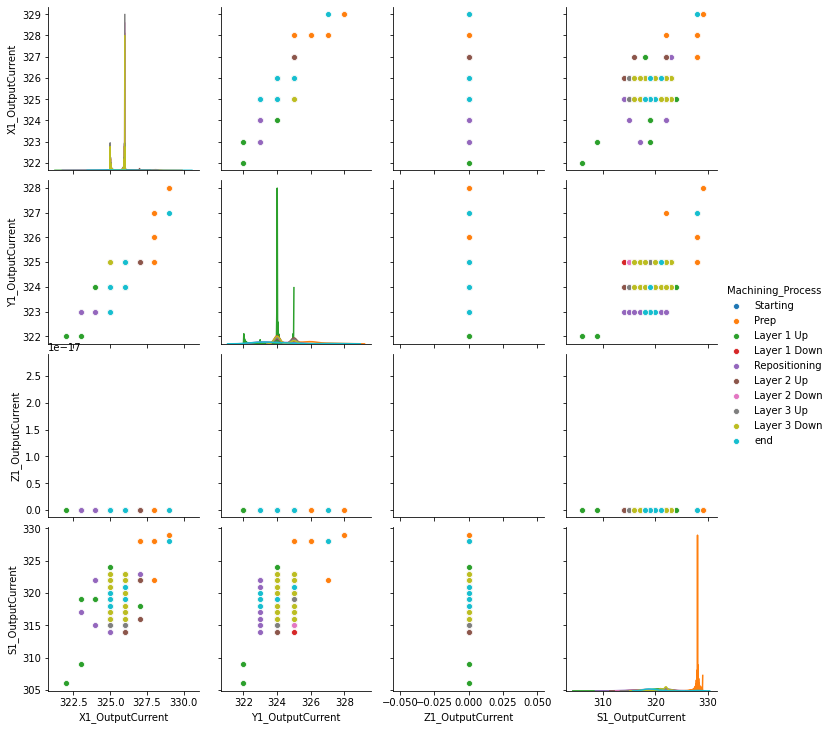

In [12]:
sns.pairplot(experiment_01, hue='Machining_Process', vars=['X1_OutputCurrent', 'Y1_OutputCurrent', 'Z1_OutputCurrent','S1_OutputCurrent'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

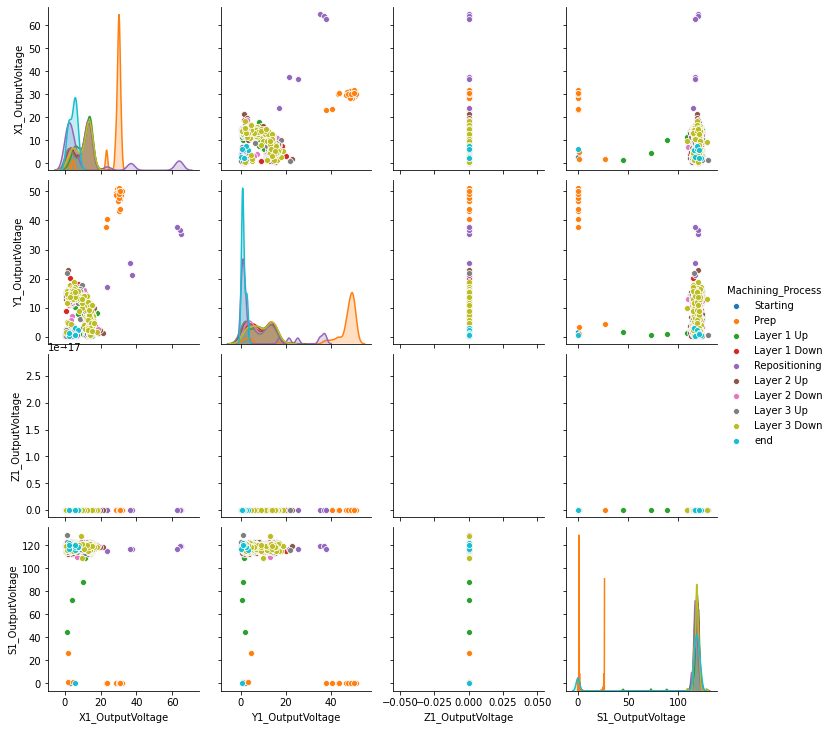

In [13]:
sns.pairplot(experiment_01, hue='Machining_Process', vars=['X1_OutputVoltage', 'Y1_OutputVoltage', 'Z1_OutputVoltage','S1_OutputVoltage'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


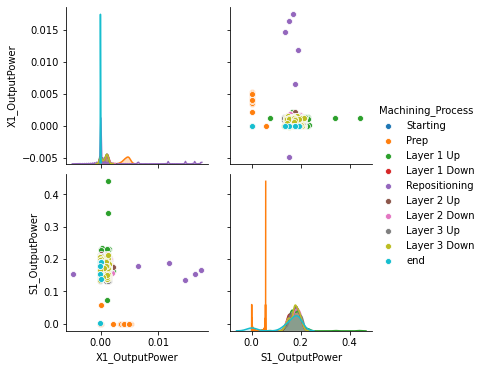

In [14]:
sns.pairplot(experiment_01, hue='Machining_Process', vars=['X1_OutputPower','S1_OutputPower'])

In [0]:
## Modeling ##
def make_model_and_predict(target_column='tool_condition'):
    frames = []
    for i in range(1,19):
        #load files
        if i < 10:
            exp_num = '0' + str(i)
        else:
            exp_num = str(i)
        frame = pd.read_csv("experiment_{}.csv".format(exp_num))
 
        #load each experiment result
        exp_result_row = experiment_result[experiment_result['No'] == i]

        #add experiment settings to features
        if target_column != 'tool_condition':
            frame['feedrate'] = exp_result_row.iloc[0]['feedrate']
            frame['clamp_pressure'] = exp_result_row.iloc[0]['clamp_pressure']

        # set prediction target from function parameter
        if target_column == 'tool_condition':
            if exp_result_row.iloc[0][target_column] == 'worn':
                frame['target'] = 1
            else:
                frame['target'] = 0
        elif target_column == 'machining_finalized':
            if exp_result_row.iloc[0][target_column] == 'yes':
                frame['target'] = 1
            else:
                frame['target'] = 0
        elif target_column == 'passed_visual_inspection':
            if exp_result_row['passed_visual_inspection'].isnull().item() == True:
                continue
            else:
                if exp_result_row.iloc[0][target_column] == 'yes':
                    frame['target'] = 1
                else:
                    frame['target'] = 0
 
        frames.append(frame)

    df = pd.concat(frames, ignore_index = True)
    
    #encode 'Machining_Process' label to number
    le = LabelEncoder()
    le.fit(df['Machining_Process'])
    df['Machining_Process'] = le.transform(df['Machining_Process'])

    #split df into train/test data
    y = np.array(df['target'])
    x = df.drop('target', axis=1).values
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)

    #fit & predict
    model = RandomForestClassifier(n_estimators=150, random_state=0)
    model.fit(x_train, y_train)
    y_score = model.predict(x_test)
    
    #evaluate results
    print('####################################')
    print('########## Predict Result ##########')
    print('####################################')
    print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
    print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
    print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
    print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

    #calculate feature importance
    print('########################################')
    print('########## Feature Importance ##########')
    print('########################################')
    features = [(df.columns[i], v) for i,v in enumerate(model.feature_importances_)]
    features.sort(key=lambda x: x[1], reverse = True)
    for j, item in enumerate(features[:10]):
        print("[{0}] {1}: {2:0.4f}".format(j, item[0], item[1]))

To speed up training and modeling cycle, I functionalized preprocessing, modeling and evaluating codes into one function.
Target variable is :
tool_condition
machining_finalized
passed_visual_inspection
Through some experiment cases, I examined which features are more important to make robust prediction models.
Especially I wanted to know which CNC imformation, for example tool position or current, is most important to detect machine failure.

In [16]:
## case1 : tool_condition ##
make_model_and_predict(target_column='tool_condition')

####################################
########## Predict Result ##########
####################################
Trained on 20228 observations and scoring with 5058 test samples.
Accuracy: 0.9939
F1 Score: 0.9943
Area under ROC curve: 0.9936
########################################
########## Feature Importance ##########
########################################
[0] Z1_CommandPosition: 0.2438
[1] Z1_ActualPosition: 0.2201
[2] M1_sequence_number: 0.0479
[3] X1_OutputCurrent: 0.0458
[4] S1_CommandPosition: 0.0390
[5] S1_ActualPosition: 0.0387
[6] Y1_OutputCurrent: 0.0376
[7] M1_CURRENT_FEEDRATE: 0.0313
[8] S1_OutputCurrent: 0.0290
[9] X1_DCBusVoltage: 0.0171


Buid the predivtive model from CNC data, and find out the main factor of tool worn out.



Picked up some imporant features below.

Z1_ActualPosition
M1CURRENTFEEDRATE
Y1_OutputCurrent
S1_ActualPosition
S1_OutputCurrent
X1_DCBusVoltage

In [17]:
## case2 : machining_finalized ##
make_model_and_predict(target_column='machining_finalized')


####################################
########## Predict Result ##########
####################################
Trained on 20228 observations and scoring with 5058 test samples.
Accuracy: 0.9994
F1 Score: 0.9997
Area under ROC curve: 0.9976
########################################
########## Feature Importance ##########
########################################
[0] feedrate: 0.1300
[1] clamp_pressure: 0.1297
[2] S1_ActualPosition: 0.1145
[3] S1_CommandPosition: 0.0987
[4] Machining_Process: 0.0464
[5] S1_OutputCurrent: 0.0367
[6] M1_CURRENT_FEEDRATE: 0.0353
[7] Z1_ActualPosition: 0.0336
[8] S1_CurrentFeedback: 0.0327
[9] Z1_CommandPosition: 0.0306


Buid the predivtive model from CNC and experiment setting data, and find out the main factor of machining not normally ended.

Picked up some imporant features below.

clamp_pressure
feedrate
S1_CommandPosition
S1_ActualPosition
Y1_DCBusVoltage
M1CURRENTFEEDRATE

In [18]:
## case3 : passed_visual_inspection ##
make_model_and_predict(target_column='passed_visual_inspection')


####################################
########## Predict Result ##########
####################################
Trained on 18500 observations and scoring with 4625 test samples.
Accuracy: 0.9983
F1 Score: 0.9990
Area under ROC curve: 0.9985
########################################
########## Feature Importance ##########
########################################
[0] X1_OutputCurrent: 0.1896
[1] Y1_OutputCurrent: 0.1582
[2] feedrate: 0.1115
[3] S1_OutputCurrent: 0.0778
[4] clamp_pressure: 0.0600
[5] M1_CURRENT_FEEDRATE: 0.0544
[6] Z1_CommandPosition: 0.0366
[7] Z1_ActualPosition: 0.0314
[8] X1_OutputVoltage: 0.0263
[9] Y1_OutputVoltage: 0.0228


Buid the predivtive model from CNC data, and find out the main factor of visual inspection failed.

Picked up some imporant features below.

Y1_OutputCurrent
feedrate
clamp_pressure
X1_OutputCurrent
S1_OutputCurrent
Z1_ActualPosition

In [19]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

time : 2.8133392333984375e-05


Discussion¶
Altogether, current and feedrate are so important features to make robust model
As a result of experiment Case2(machining_finalized), it is likely that the machining position is more important to manufacture high-quality product.
Finally, to keep the machining tools good condition and manufacture high-quality product continuously, it is considered that adjusting the amount of current and feedrate is most critical viewpoint.